## Exploratory Data Analysis

### Load and Combine Years DataFrames

In [3]:
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [4]:
print(len(df_2000) + len(df_2001))

2590


In [5]:
df = pd.concat([df_2000, df_2001])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,2244.0,PG


In [6]:
len(df)

2590

### 1. Movies With Values > 0 for Budget or Revenue

In [7]:
df_movie_values = df[(df['budget'] > 0) | (df['revenue'] > 0)]
df_movie_values.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,2244.0,PG


In [8]:
print(f'Movies with either Budget or Revenue values above 0 (zero): {len(df_movie_values)}')

Movies with either Budget or Revenue values above 0 (zero): 639


### 2. Number of Movies in Each Certification Category
- G, PG, PG-13, R

In [9]:
ind = df_movie_values['certification'].value_counts().index
ind

Index(['R', 'PG-13', 'PG', 'NR', 'G'], dtype='object')

In [10]:
val = df_movie_values['certification'].value_counts().values
val

array([232, 131,  35,  17,  15], dtype=int64)

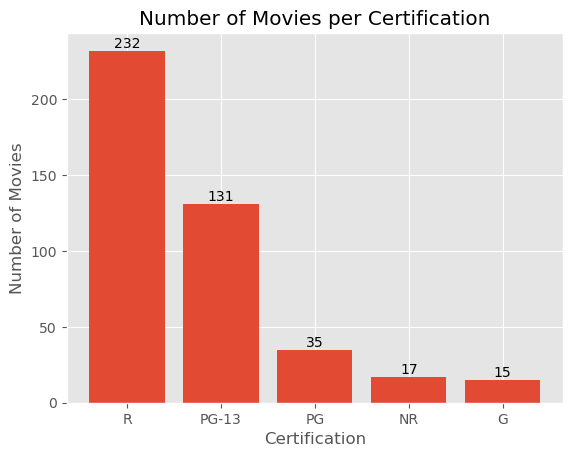

In [147]:
plt.style.use('ggplot')

fig, ax = plt.subplots()

bars = ax.bar(ind, val)
ax.bar_label(bars)

ax.set_xlabel('Certification')
ax.set_ylabel('Number of Movies')
ax.set_title('Number of Movies per Certification');

### 3. Average Revenue per Certification Category

In [52]:
pd.options.display.float_format = '{:,.2f}'.format

avg_revenue = df_movie_values.groupby('certification')['revenue'].mean()
avg_revenue

certification
G       117,364,760.80
NR        9,588,674.35
PG      110,679,080.09
PG-13    99,287,858.33
R        32,660,007.84
Name: revenue, dtype: float64

In [89]:
revenue = {avg_revenue.index[0]:avg_revenue.values[0].round(2),
           avg_revenue.index[1]:avg_revenue.values[1].round(2), 
           avg_revenue.index[2]:avg_revenue.values[2].round(2),
           avg_revenue.index[3]:avg_revenue.values[3].round(2),
           avg_revenue.index[4]:avg_revenue.values[4].round(2)}
revenue

{'G': 117364760.8,
 'NR': 9588674.35,
 'PG': 110679080.09,
 'PG-13': 99287858.33,
 'R': 32660007.84}

In [137]:
# function to add value labels
# from https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]+2000000, '{:,.0f}'.format(y[i]), ha = 'center', color='Blue')

In [149]:
x = list(revenue.keys())
y = [revenue['PG'], revenue['R'], revenue['G'], revenue['PG-13'], revenue['NR']]

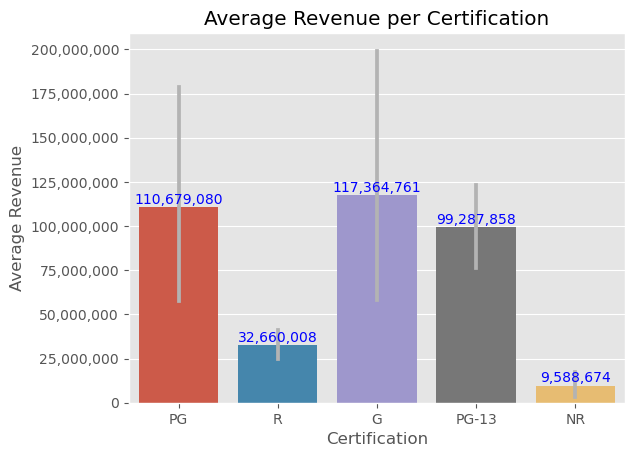

In [150]:
fig, ax = plt.subplots()

ax = sns.barplot(data=df_movie_values, x=df_movie_values['certification'],
                y=df_movie_values['revenue'], errcolor='.7')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

addlabels(x,y)

ax.set_xlabel('Certification')
ax.set_ylabel('Average Revenue')
ax.set_title('Average Revenue per Certification');

### 4. Average Budget per Certification Category

In [143]:
avg_budget = df_movie_values.groupby('certification')['budget'].mean()
avg_budget

certification
G       38,133,333.33
NR       6,302,358.47
PG      44,828,492.40
PG-13   42,993,571.96
R       19,451,743.32
Name: budget, dtype: float64

In [144]:
budget = {avg_budget.index[0]:avg_budget.values[0].round(2),
           avg_budget.index[1]:avg_budget.values[1].round(2), 
           avg_budget.index[2]:avg_budget.values[2].round(2),
           avg_budget.index[3]:avg_budget.values[3].round(2),
           avg_budget.index[4]:avg_budget.values[4].round(2)}
budget

{'G': 38133333.33,
 'NR': 6302358.47,
 'PG': 44828492.4,
 'PG-13': 42993571.96,
 'R': 19451743.32}

In [152]:
x2 = list(budget.keys())
y2 = [budget['PG'], budget['R'], budget['G'], budget['PG-13'], budget['NR']]

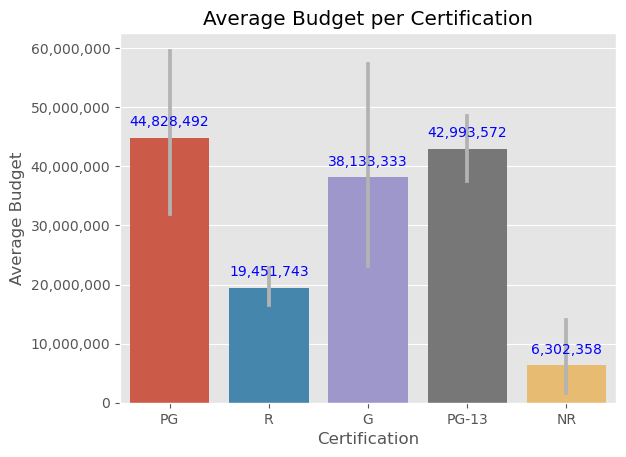

In [153]:
fig, ax = plt.subplots()

ax = sns.barplot(data=df_movie_values, x=df_movie_values['certification'],
                y=df_movie_values['budget'], errcolor='.7')

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

addlabels(x2,y2)

ax.set_xlabel('Certification')
ax.set_ylabel('Average Budget')
ax.set_title('Average Budget per Certification');

In [155]:
df_movie_values.to_csv("Data/tmdb_results_combined.csv.gz", compression='gzip',
                      index=False)